In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
def load_data(path: str, languages: list) -> pd.DataFrame:
    df = pd.read_csv(path)
    df = df.rename(columns={'name': 'language'})
    df = df[df['language'].isin(languages)]
    df['date'] = (df['quarter'] * 3).astype(str).str.zfill(2) + '/' + df['year'].astype(str)
    df['date'] = pd.to_datetime(df['date'], format='%m/%Y')
    return df


def show_trend(df: pd.DataFrame, title: str, target_language: str = 'Rust', relative=True) -> None:
    y = 'count'
    if relative:
        df['relative_count'] = df['count'] / df.groupby('language')['count'].transform('max')
        y = 'relative_count'
    sns.set_palette("hls", 8)
    sns.set_style('darkgrid')
    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(data=df, x='date', y=y, hue='language', legend='full', alpha=0.8)
    target_df = df[df['language'] == target_language]
    sns.lineplot(data=target_df, x='date', y=y, linewidth=1.9, color='blue', ax=ax, legend=False)
    handles, labels = ax.get_legend_handles_labels()
    for i, label in enumerate(labels):
        if label == target_language:
            handles[i].set_color('blue')
    plt.xlabel('')
    plt.ylabel('')
    plt.title(title + ' (relative)')
    plt.tight_layout()
    plt.show()

In [3]:
languages = ['Rust', 'C++', 'Python', 'Java', 'C#', 'JavaScript']
directory = 'githut-csv/'

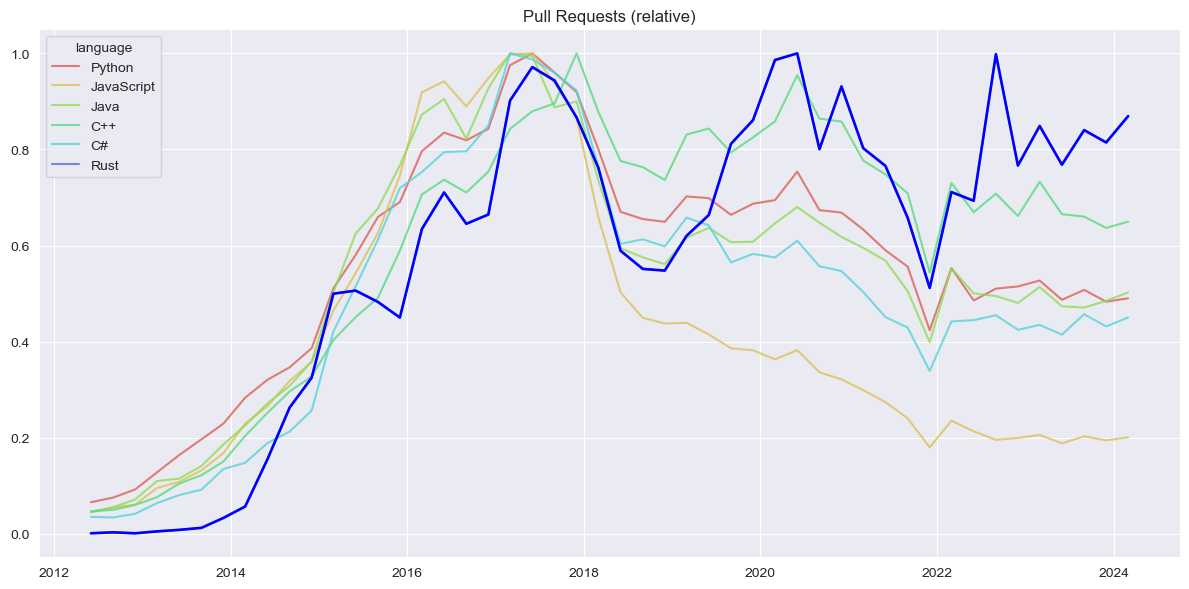

In [4]:
file_path = directory + 'gh-pull-request.json.csv'
pull_requests = load_data(file_path, languages)
show_trend(pull_requests, 'Pull Requests')

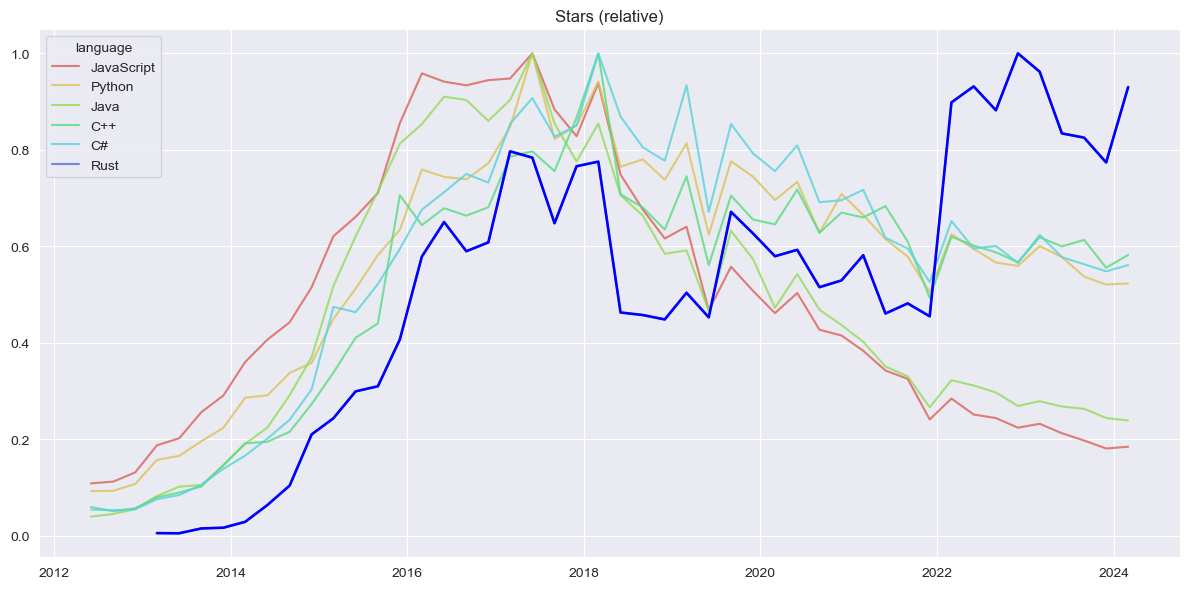

In [5]:
file_path = directory + 'gh-star-event.json.csv'
stars = load_data(file_path, languages)
show_trend(stars, 'Stars')

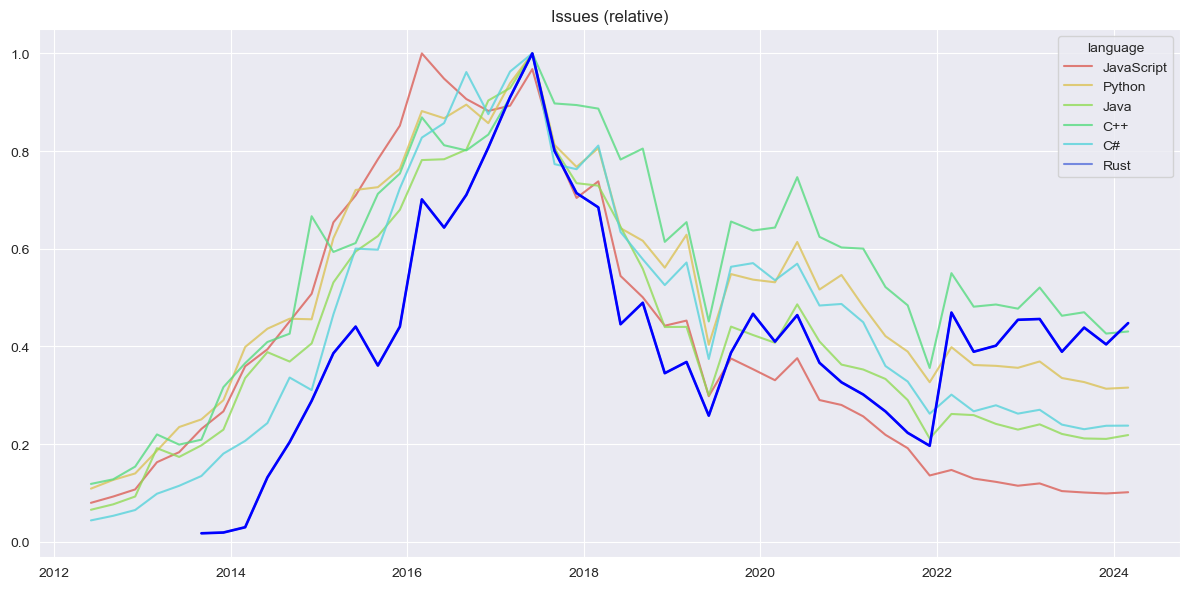

In [6]:
file_path = directory + 'gh-issue-event.json.csv'
issues = load_data(file_path, languages)
show_trend(issues, 'Issues')

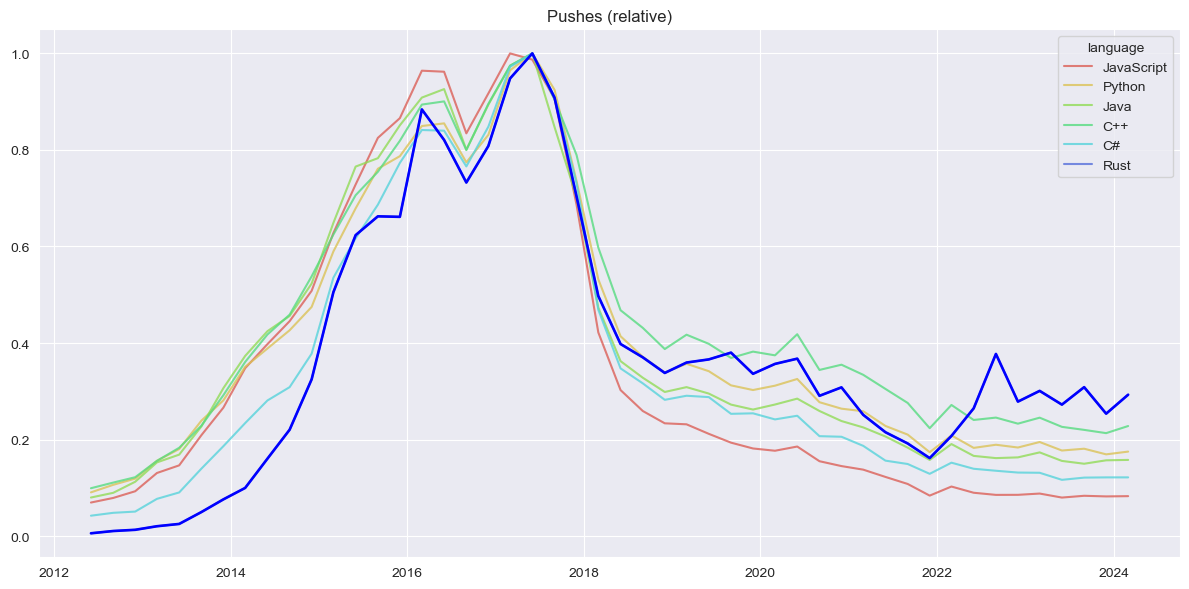

In [7]:
file_path = directory + 'gh-push-event.json.csv'
pushes = load_data(file_path, languages)
show_trend(pushes, 'Pushes')